## Load multi-agent soccer environment (from deepmind control locomotion suite)

W1012 07:26:59.948156 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.949870 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.951018 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.952297 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.953486 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.954734 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.955966 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.
W1012 07:26:59.957339 139920773486336 entity.py:478] Cannot set velocity on Entity with no free joint.


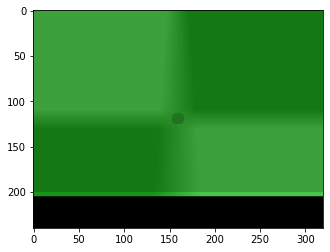

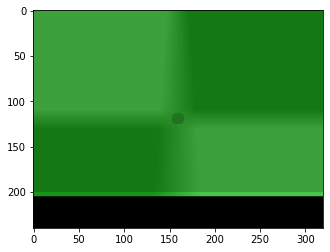

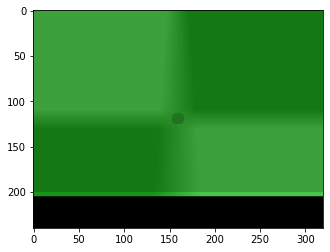

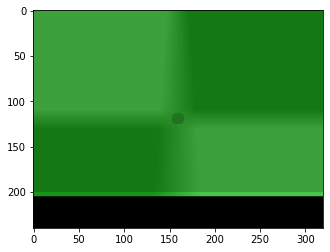

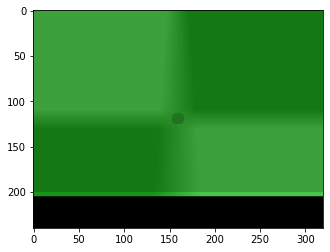

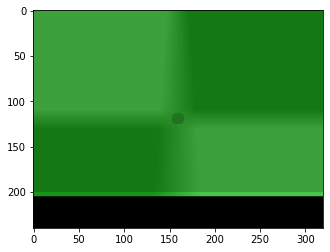

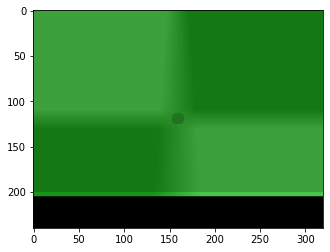

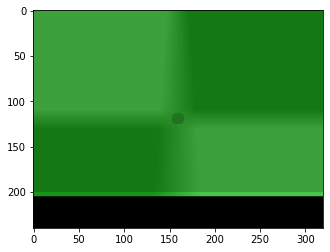

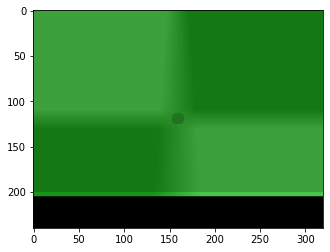

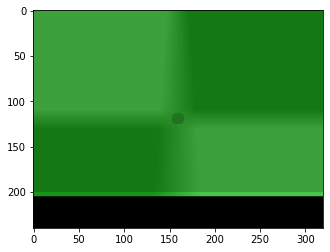

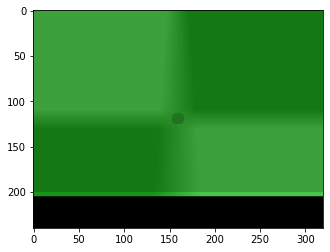

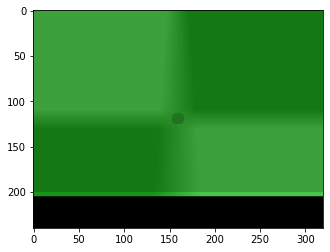

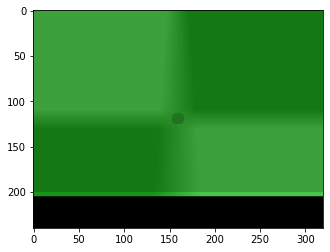

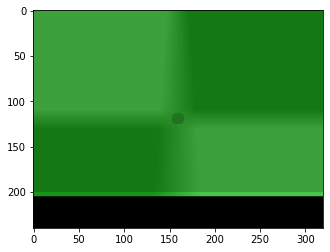

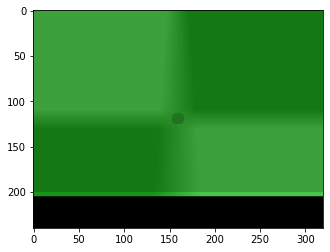

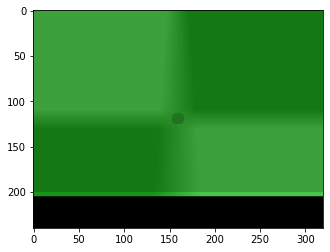

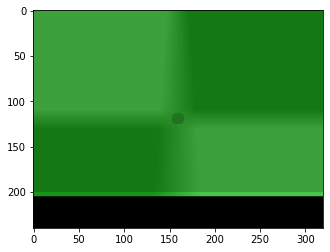

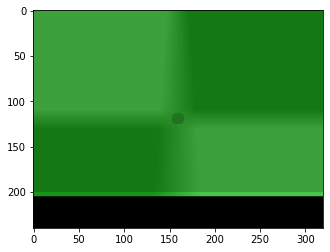

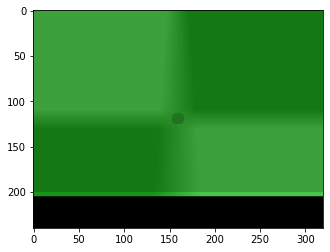

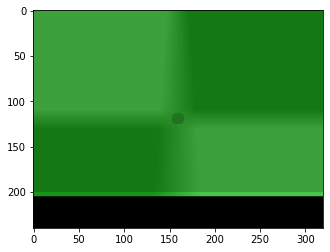

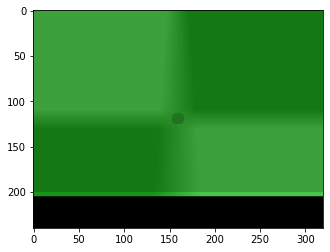

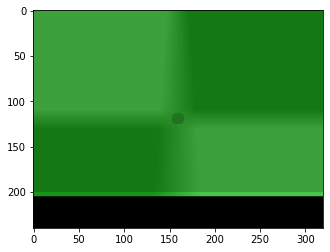

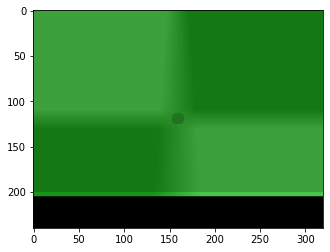

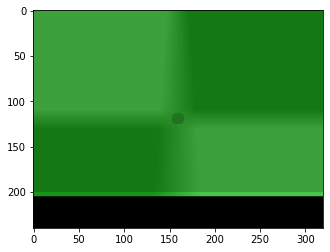

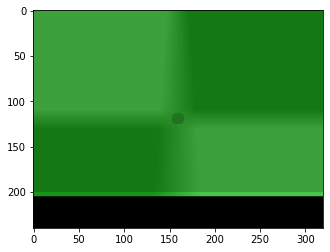

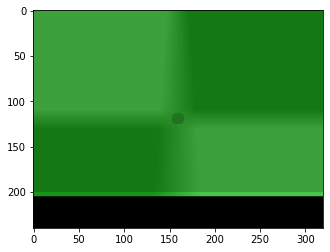

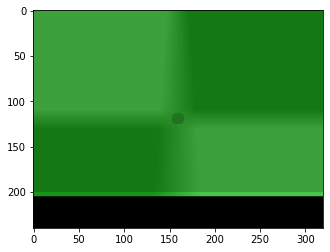

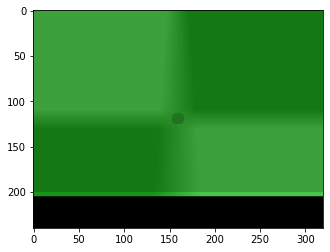

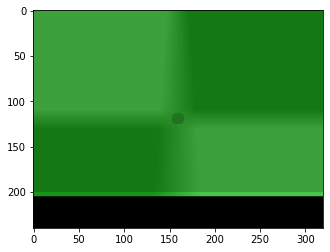

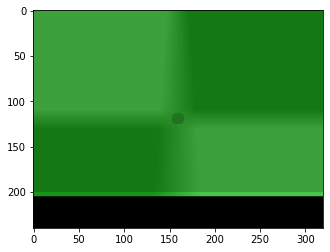

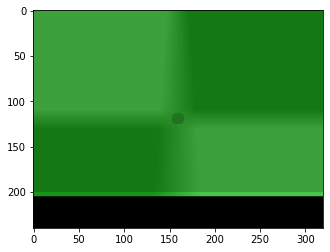

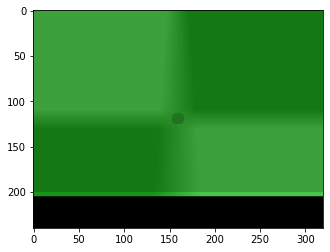

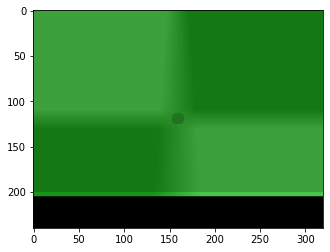

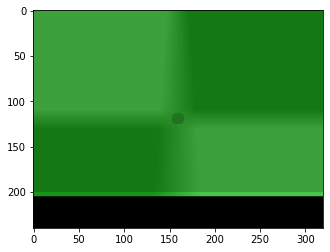

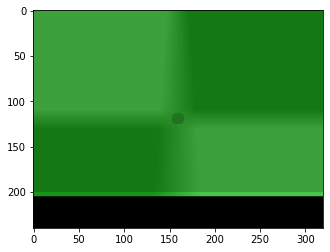

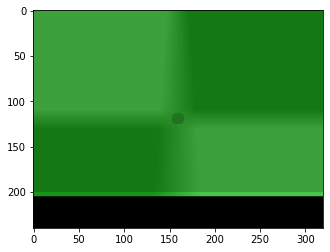

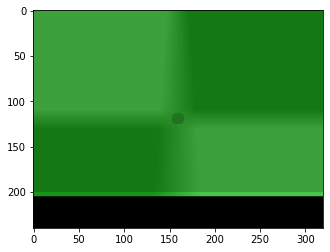

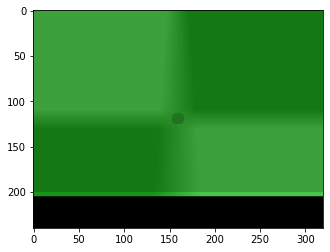

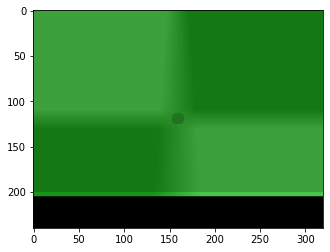

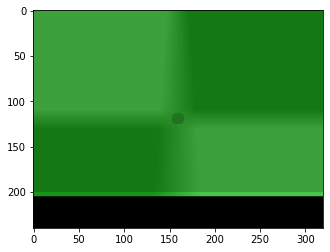

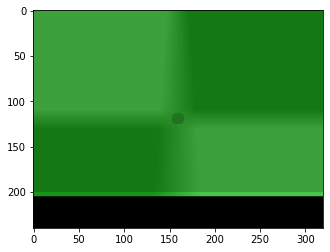

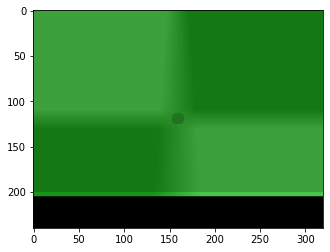

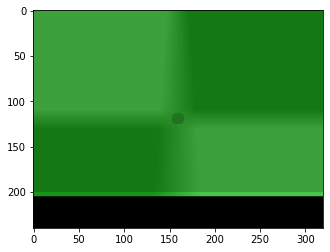

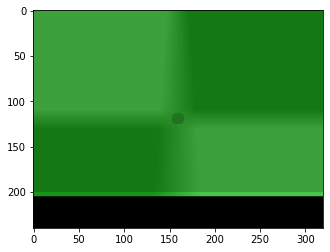

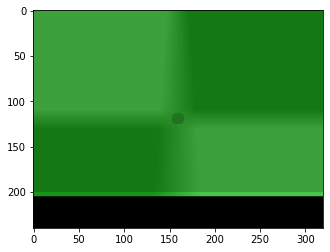

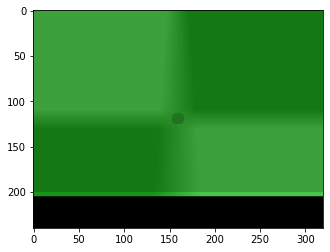

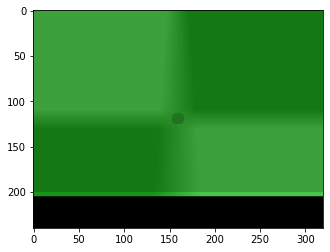

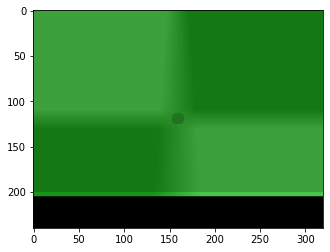

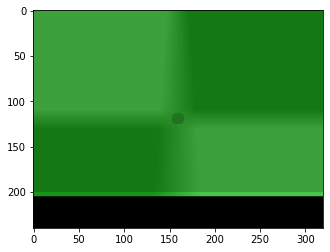

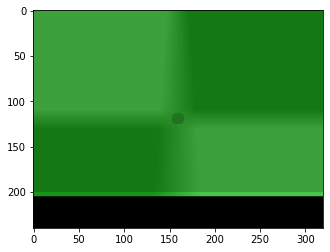

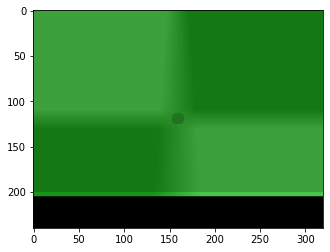

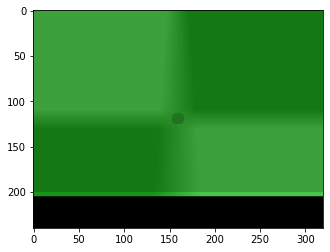

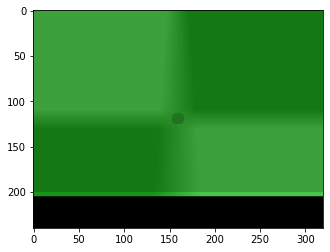

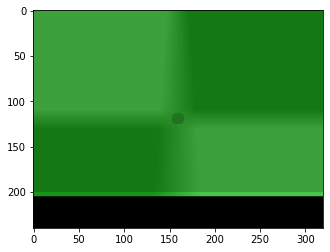

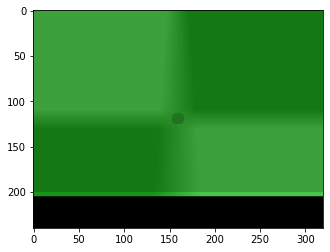

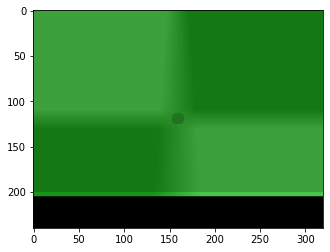

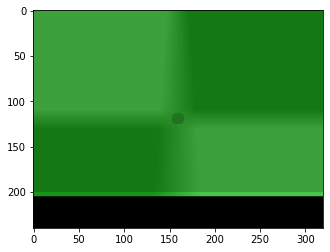

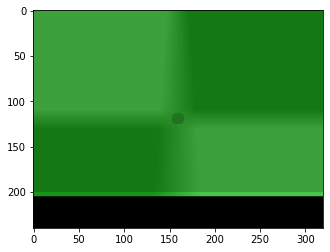

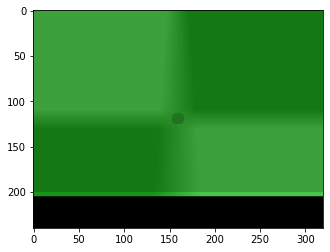

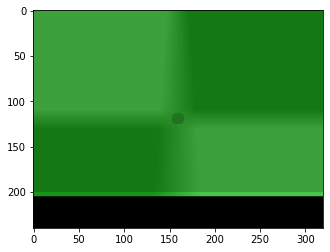

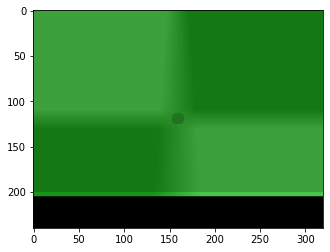

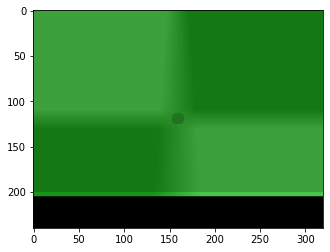

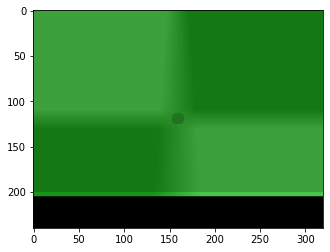

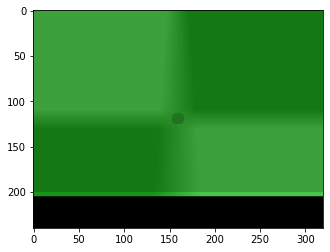

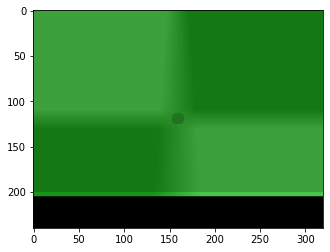

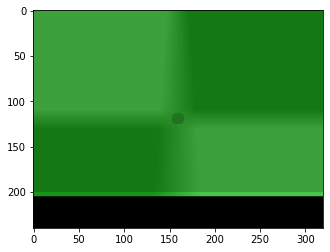

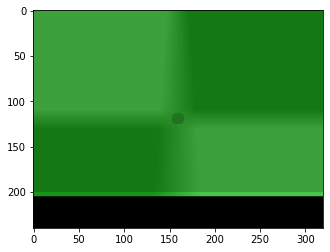

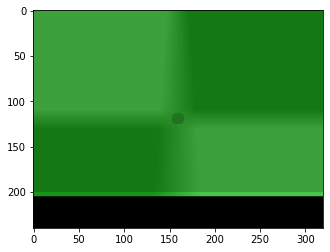

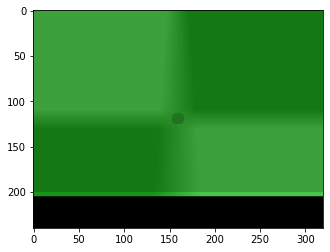

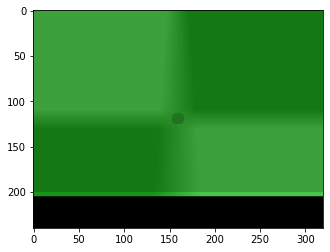

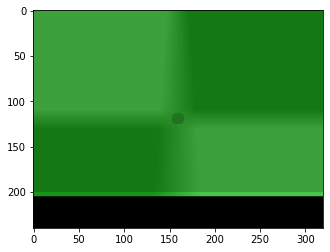

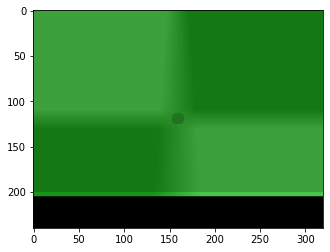

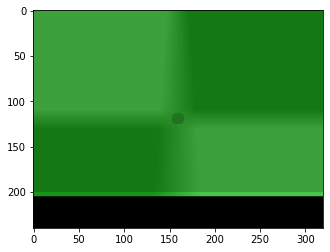

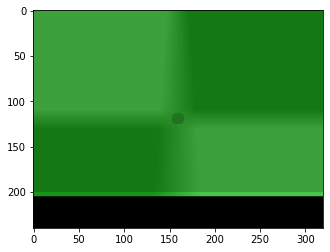

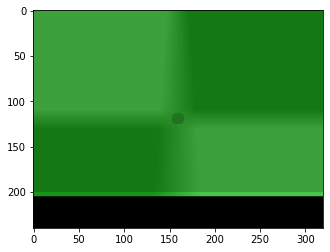

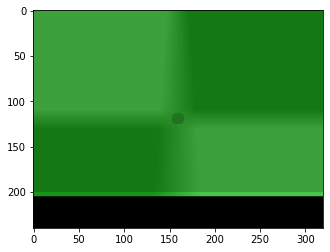

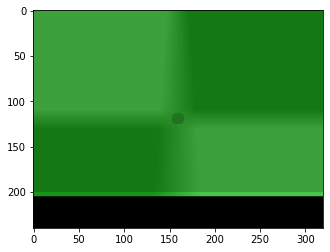

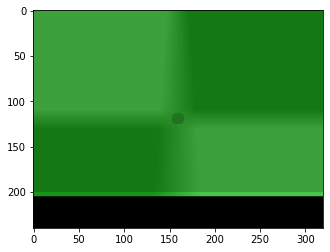

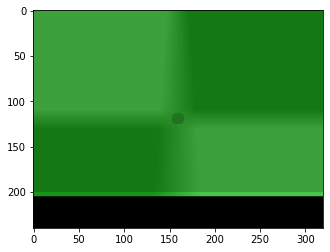

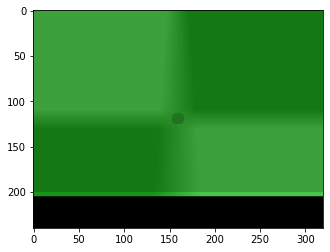

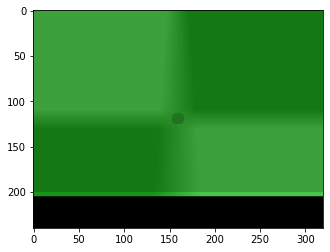

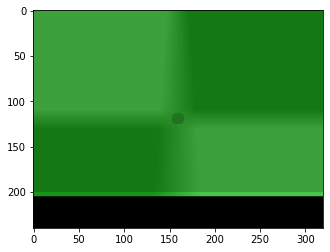

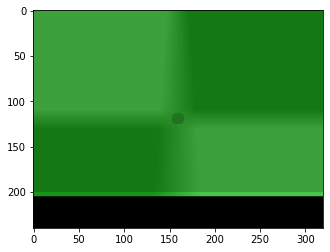

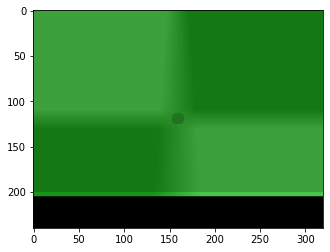

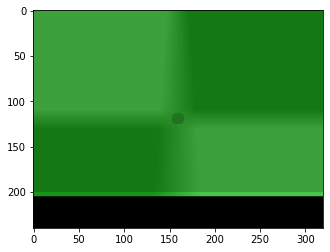

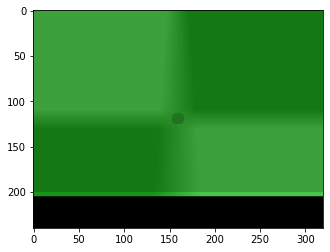

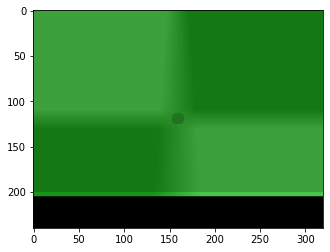

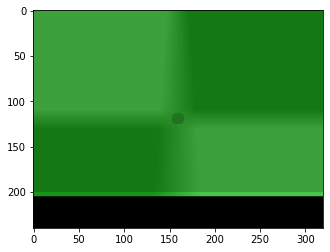

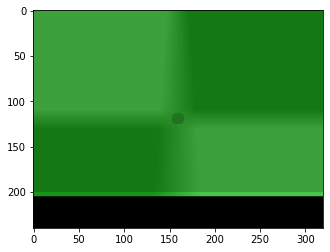

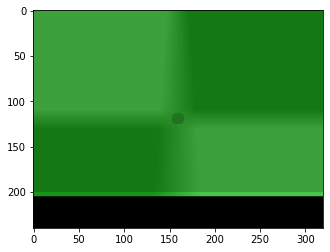

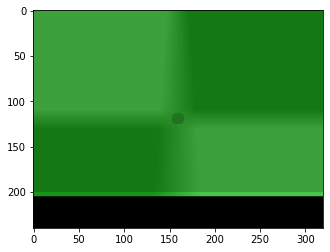

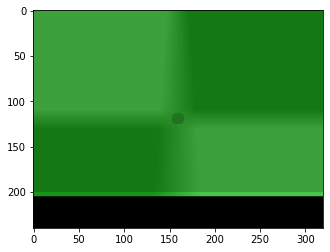

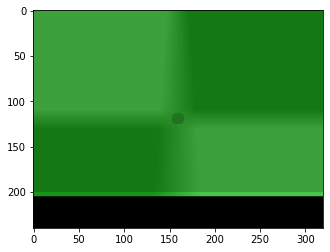

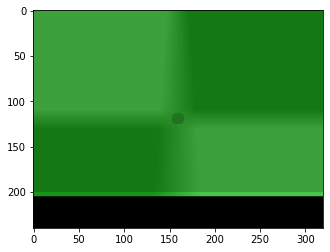

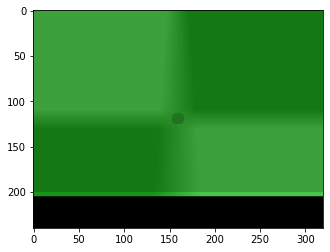

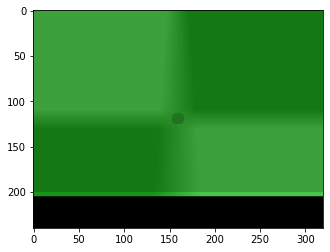

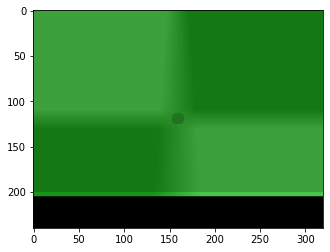

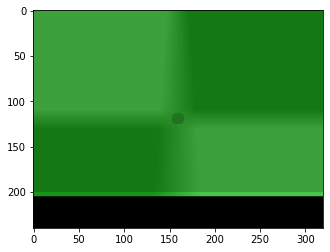

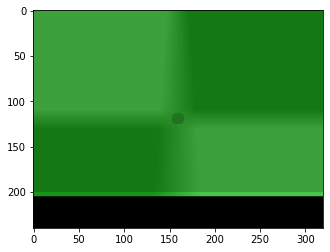

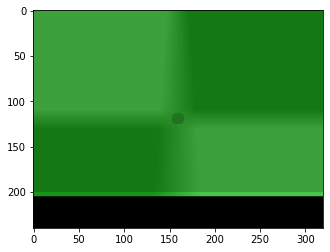

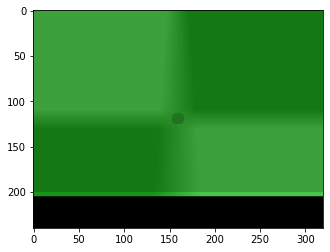

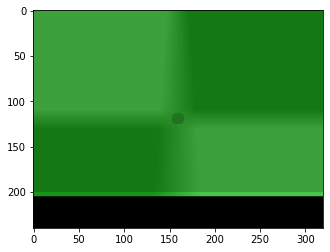

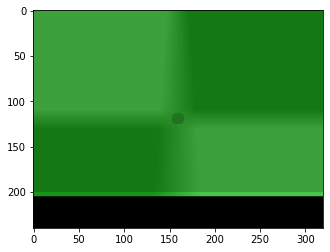

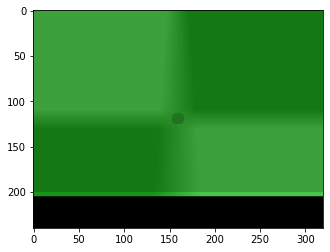

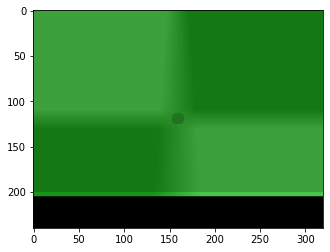

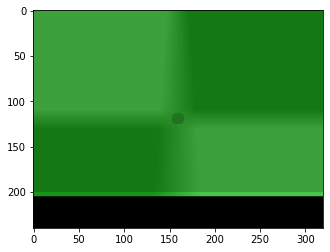

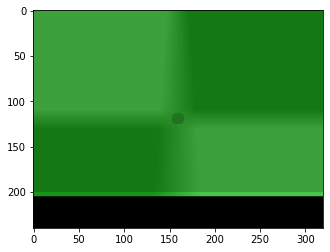

KeyboardInterrupt: 

In [13]:
import numpy as np
from dm_control.locomotion import soccer as dm_soccer
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Load the 2-vs-2 soccer environment with episodes of 10 seconds:
dm_env = dm_soccer.load(team_size=2, time_limit=10.)

# Retrieves action_specs for all 4 players.
action_specs = dm_env.action_spec()

# Step through the environment for one episode with random actions.
time_step = dm_env.reset()
while not time_step.last():
    actions = []
    for action_spec in action_specs:
        action = np.random.uniform(
        action_spec.minimum, action_spec.maximum, size=action_spec.shape)
        actions.append(action)
    time_step = dm_env.step(actions)
    
    img = dm_env.physics.render()
    plt.imshow(img)
    plt.show()
    time.sleep(1)

#   for i in range(len(action_specs)):
#     (
#         "Player {}: reward = {}, discount = {}, observations = {}.".format(
#             i, time_step.reward[i], time_step.discount,
#             time_step.observation[i]))

In [17]:
from dm_control import viewer
import functools

viewer.launch(environment_loader=functools.partial(dm_soccer.load, team_size=2))


ImportError: Cannot create a window because no windowing system could be imported

### Create gym wrapper

In [2]:
import gym
import dm_control2gym as dmc2gym

env = dmc2gym.wrapper.DmControlWrapper('', '', env=dm_env)

ArgumentError: argument 2: <class 'TypeError'>: expected LP_c_void_p instance instead of EGLDeviceEXT_pointer_Array_10

### Test gym interface

In [3]:
obs, rew, done, info = env._step([np.array([0,0,0]) for i in range(4)])
print(obs)

W0927 07:05:19.402275 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2019-09-27 07:05:19,402] Cannot set velocity on Entity with no free joint.
W0927 07:05:19.405369 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2019-09-27 07:05:19,405] Cannot set velocity on Entity with no free joint.
W0927 07:05:19.407356 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2019-09-27 07:05:19,407] Cannot set velocity on Entity with no free joint.
W0927 07:05:19.409510 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2019-09-27 07:05:19,409] Cannot set velocity on Entity with no free joint.
W0927 07:05:19.411519 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2019-09-27 07:05:19,411] Cannot set velocity on Entity with no free joint.
W0927 07:05:19.413496 140527511402240 entity.py:478] Cannot set velocity on Entity with no free joint.
[2

[array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.89030787e-38, -2.73164679e-39,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.25284656e+00, -1.75116842e+01, -1.50000000e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.13184536e+00,  3.53163314e+00,  0.00000000e+00,
       -9.68333657e-01, -2.49659626e-01,  0.00000000e+00,  2.49659626e-01,
       -9.68333657e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.61764221e+01,
       -6.02084599e+00, 

## rlpyt Training Example

In [3]:
import sys
import gym
from rlpyt.utils.launching.affinity import affinity_from_code
from rlpyt.samplers.parallel.cpu.sampler import CpuSampler
from rlpyt.samplers.parallel.cpu.collectors import CpuResetCollector
from rlpyt.envs.gym import make as gym_make
from rlpyt.algos.pg.ppo import PPO
from rlpyt.agents.pg.mujoco import MujocoFfAgent
from rlpyt.runners.minibatch_rl import MinibatchRl
from rlpyt.utils.logging.context import logger_context
from rlpyt.utils.launching.variant import load_variant, update_config

from rlpyt.experiments.configs.mujoco.pg.mujoco_ppo import configs


def build_and_train(slot_affinity_code, log_dir, run_ID, config_key):
    affinity = affinity_from_code(slot_affinity_code)
    config = configs[config_key]
    variant = load_variant(log_dir)
    config = update_config(config, variant)

    sampler = CpuSampler(
        EnvCls=gym_make,
        env_kwargs=config["env"],
        CollectorCls=CpuResetCollector,
        **config["sampler"]
    )
    algo = PPO(optim_kwargs=config["optim"], **config["algo"])
    agent = MujocoFfAgent(model_kwargs=config["model"], **config["agent"])
    runner = MinibatchRl(
        algo=algo,
        agent=agent,
        sampler=sampler,
        affinity=affinity,
        **config["runner"]
    )
    name = config["env"]["id"]
    with logger_context(log_dir, run_ID, name, config):
        runner.train()


if __name__ == "__main__":
    build_and_train(*sys.argv[1:])

TypeError: build_and_train() missing 2 required positional arguments: 'run_ID' and 'config_key'

In [4]:
import gym
print(gym.__version__)

0.14.0


In [5]:
import gym.spaces.dict